# NTV - Overview

This overview presents different facets and covers all the features of this package.

## Summary
*(active link on jupyter Notebook or Nbviewer)*
- [from native entity to JSON-text](#from-native-entity-to-JSON-text)
- [All JSON data is JSON-NTV data](#All-JSON-data-is-JSON-NTV-data)
- [NTV data is named](#NTV-data-is-named)
- [NTV data is typed](#NTV-data-is-typed)
- [Types can be predefined](#Types-can-be-predefined)
- [Types are nested](#Types-are-nested)
- [NTV data is nested](#NTV-data-is-nested)
- [NTV-json format is reversible for NTV entities](#NTV-json-format-is-reversible-for-NTV-entities)
- [Options are available for NTV-json](#Options-are-available-for-NTV-json)
- [Changes and comments are managed](#Changes-and-comments-are-managed)
- [JSON-array and JSON-object are equivalent for NtvList](#JSON-array-and-JSON-object-are-equivalent-for-NtvList)
- [NTV is a tree data structure](#NTV-is-a-tree-data-structure)
- [The json representation can be more or less deep](#The-json-representation-can-be-more-or-less-deep)
- [NTV entities are compatible with tabular data tools](#NTV-entities-are-compatible-with-tabular-data-tools)
- [CSV data is enriched with NTV structures](#CSV-data-is-enriched-with-NTV-structures)
- [NTV data can be created from entities of all types](#NTV-data-can-be-created-from-entities-of-all-types)
- [Template structure can be used](#Template-structure-can-be-used)
- [Custom types are allowed](#Custom-types-are-allowed)
- [NTV can be used with custom entities](#NTV-can-be-used-with-custom-entities)

## References
- [JSON-NTV specification](https://github.com/loco-philippe/NTV/blob/main/documentation/JSON-NTV-standard.pdf)
- [JSON-NTV classes and methods](https://loco-philippe.github.io/NTV/json_ntv.html)

This Notebook can also be viewed at [nbviewer](http://nbviewer.org/github/loco-philippe/NTV/tree/main/example)

-----

In [1]:
from json_ntv import NtvSingle, NtvList, Ntv, NtvConnector, Datatype, Namespace, to_csv, from_csv, NtvComment
from datetime import date, datetime
from shapely import Point

In [2]:
ntv = """
flowchart LR
    text["#10240;#10240;JSON#10240;#10240;\ntext"]
    val["#10240;JSON-NTV#10240;\nvalue"]
    ntv["#10240;#10240;#10240;NTV#10240;#10240;#10240;\nentity"]
    nat["#10240;<b>native</b>#10240;\nentity"]
    text--->|JSON load|val
    val--->|JSON dump|text
    val--->|Ntv.from_obj|ntv
    ntv--->|.to_obj|nat
    ntv--->|.to_obj|val
    nat--->|Ntv.from_obj|ntv
"""

## from native entity to JSON-text
- The diagram below explains how to transform **any type of data** into a neutral exchange format

In [3]:
from base64 import b64encode
from IPython.display import Image, display
display(Image(url="https://mermaid.ink/img/" + b64encode(ntv.encode("ascii")).decode("ascii")))

- the conversion between native entity and JSON-text is reversible (round trip)

In [4]:
loc_and_date = {'newyear': date(2023, 1, 2), 'Paris': Point(2.3, 48.9)}
json_loc_date = Ntv.obj(loc_and_date).to_obj(encoded=True)
print(json_loc_date, type(json_loc_date))

Ntv.obj(json_loc_date).to_obj(format='obj') == loc_and_date

{"newyear:date": "2023-01-02", "Paris:point": [2.3, 48.9]} <class 'str'>


True

## All JSON data is JSON-NTV data
NTV entities : 
- NtvSingle : primitive entity which is not composed of any other entity
- NtvList : ordered sequence of NTV entities

In [5]:
liste = [None, 1, [1,2], {'key': 'value'}, {'key1': 'val1', 'key2': 'val2'}, 
         {'example': [21, [1,2], {'key1': 3, 'key2': 4}]}]
for json in liste:
    ntv = Ntv.obj(json)
    print('{:<50} {} {}'.format(str(ntv), 'NTV entity : ', type(ntv)))

null                                               NTV entity :  <class 'json_ntv.ntv.NtvSingle'>
1                                                  NTV entity :  <class 'json_ntv.ntv.NtvSingle'>
[1, 2]                                             NTV entity :  <class 'json_ntv.ntv.NtvList'>
{"key": "value"}                                   NTV entity :  <class 'json_ntv.ntv.NtvSingle'>
{"key1": "val1", "key2": "val2"}                   NTV entity :  <class 'json_ntv.ntv.NtvList'>
{"example": [21, [1, 2], {"key1": 3, "key2": 4}]}  NTV entity :  <class 'json_ntv.ntv.NtvList'>


## NTV data is named
- a name can be added or remove

In [6]:
simple = NtvSingle(3)

print('simple data              : ', simple)
simple.set_name('value')
print('simple data with name    : ', simple)
simple.set_name('')
print('simple data without name : ', simple)

simple data              :  3
simple data with name    :  {"value": 3}
simple data without name :  3


## NTV data is typed
- default type is 'json'


In [7]:
# {':json' : 21} and 21 are equivalent
number = 21
typed_number = {':json' : 21}
comparison = Ntv.obj(typed_number) == Ntv.obj(number)
print("Are {':json' : 21} and 21 equivalent ? ", comparison)

Are {':json' : 21} and 21 equivalent ?  True


## Types can be predefined
- many standard types are included

{'paris': <POINT (4.1 40.5)>}


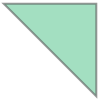

In [8]:
# {'paris:point' : [4.1, 40.5] } indicates that the object named 'paris' has geographical coordinates [4.1, 40.5]
city = Ntv.obj({'paris:point' : [4.1, 40.5] })
print(city.to_obj(format='obj'))

# another coordinates are available (e.g. line, polygon)
city = Ntv.obj({':polygon' : [[[0,1], [1,1], [1,0], [0,1]]] })
city.to_obj(format='obj')

## Types are nested
- a Type is defined by a name and a Namespace.  
- a Namespace is represented by a string followed by a point. Namespaces may be nested


In [9]:
picardie = NtvList.obj({'picardie::fr.':{'oise:dep': '60', 'aisne:dep': '02', 'somme:dep': '80', 'hauts de france:reg': 32}})

# 'dep' is a type (french department) defined in the Namespace 'fr.' (french types)
# the default Namespace 'fr.' is aggregated with the 'dep' type

print(picardie, '\n')
print(picardie[0])

# '60' is the 'fr.dep' code for the department of Oise


{"picardie::fr.": {"oise:dep": "60", "aisne:dep": "02", "somme:dep": "80", "hauts de france:reg": 32}} 

{"oise:fr.dep": "60"}


## NTV data is nested
- A structure with ordered list of NTV entities is available
- The type can be shared between entities included in the same entity
- The type defined in a structure is a default type
- Two NTV structures are equal if the name and the value are equals (the default type can be different)

In [10]:
# structure definied by JSON-Array
cities1 = Ntv.obj({'cities':        [{'paris:point': [4.1, 40.5]}, {':point': [4.5, 41.2]}]})
cities2 = Ntv.obj({'cities::point': [{'paris':       [4.1, 40.5]},            [4.5, 41.2] ]})

# structure definied by JSON-Object
cities3 = Ntv.obj({'cities::point': {'paris':       [4.1, 40.5], 'lyon':       [4.5, 41.2]}})
cities4 = Ntv.obj({'cities':        {'paris:point': [4.1, 40.5], 'lyon:point': [4.5, 41.2]}})

print('equivalent structures ? ', cities1 == cities2 and cities3 == cities4)

# default type in a structure
cities5 = Ntv.obj({'cities::point': [{'paris': [4.1, 40.5]}, [4.5, 41.2], {':date': '2012-02-15'}]})
print('coordinates and date in a typed structure : ', cities5)
cities5.set_type()
print('coordinates and date in an untyped structure : ', cities5)

equivalent structures ?  True
coordinates and date in a typed structure :  {"cities::point": [{"paris": [4.1, 40.5]}, [4.5, 41.2], {":date": "2012-02-15"}]}
coordinates and date in an untyped structure :  {"cities": [{"paris:point": [4.1, 40.5]}, {":point": [4.5, 41.2]}, {":date": "2012-02-15"}]}


## NTV-json format is reversible for NTV entities
- The entity build with the Json representation of another entity is identical to the original NTV entity

In [11]:
Ntv.obj(simple. to_obj()) == simple  and \
Ntv.obj(city.   to_obj()) == city    and \
Ntv.obj(cities2.to_obj()) == cities2 and \
Ntv.obj(cities4.to_obj()) == cities4

True

## Options are available for NTV-json
- selected values
- encoded data
- data format

In [12]:
print('Json format   : ', cities2.to_obj())
print('only values   : ', cities2.to_obj(simpleval=True))
print('Json text     : ', cities2.to_obj(encoded=True))
print('Json binary   : ', cities2.to_obj(format='cbor', encoded=True))
print('tuple format  : ', cities2.to_tuple())
print('object format : ', cities2.to_obj(format='obj'))
print('simple Json   : ', cities2.to_repr())
print('Json codes    : ', cities2.to_repr(False, False, False)) 
# Codification : first letter: "s" (NtvSingle), "l" (NtvList), additional letters: 'N' (named), 'T' (typed)

Json format   :  {'cities::point': [{'paris': [4.1, 40.5]}, [4.5, 41.2]]}
only values   :  [[4.1, 40.5], [4.5, 41.2]]
Json text     :  {"cities::point": [{"paris": [4.1, 40.5]}, [4.5, 41.2]]}
Json binary   :  b'\xa1mcities::point\x82\xa1eparis\x82\xfb@\x10ffffff\xfb@D@\x00\x00\x00\x00\x00\x82\xfb@\x12\x00\x00\x00\x00\x00\x00\xfb@D\x99\x99\x99\x99\x99\x9a'
tuple format  :  ('NtvList', 'cities', 'point', [('NtvSingle', 'paris', 'point', [4.1, 40.5]), ('NtvSingle', '', 'point', [4.5, 41.2])])
object format :  {'cities::point': [{'paris': <POINT (4.1 40.5)>}, <POINT (4.5 41.2)>]}
simple Json   :  {'l-cities-point': ['s-paris-point-[4.1, 40.5]', 's-point-[4.5, 41.2]']}
Json codes    :  {'lNT': ['sNT', 'sT']}


## Changes and comments are managed
- change proposals and comments can be added to the NTV entities
- they can be rejected or accepted

In [13]:
dates_json = {'dates::date': { 'date1':'1964-01-01', 'date2': '1985-02-05', 'date3': '2022-01-21'}}
dates = Ntv.obj(dates_json)

dates_comment = NtvComment(dates)

dates_comment.add({'list-op': [{'op': 'replace', 'path': '/date1', 'entity': {'date1:date':'1965-01-01'}}], 
                   'comment': 'year is not correct'})
dates_comment.add('everything is correct')
dates_reject = dates_comment.reject(all_comment=True).ntv
print('\nare rejected comments deleted ? ', dates == dates_reject)

dates_accept = dates_comment.accept().ntv
print("is 'date1' updated (1965-01-01) ? ", dates_accept['date1'].val == '1965-01-01')


are rejected comments deleted ?  True
is 'date1' updated (1965-01-01) ?  True


## JSON-array and JSON-object are equivalent for NtvList
- if the constraint of the JSON-object (keys are present) is respected

In [14]:
ntv_lis = Ntv.obj({'array or object': [{'key1': 'value1'}, {'key2': 'value2'}]})
ntv_obj = Ntv.obj({'array or object': {'key1': 'value1', 'key2': 'value2'}})
print('are NTV entities from a JSON-array or a JSON-object the same ? ', ntv_lis == ntv_obj, '\n')

print('ntv - Array  : ', ntv_lis.to_obj(ntv_list=True))
print('ntv - Object : ', ntv_lis.to_obj(ntv_list=False))

print('\nAn NTV entity has JSON-array and JSON-object representation' )

are NTV entities from a JSON-array or a JSON-object the same ?  True 

ntv - Array  :  {'array or object': {'key1': 'value1', 'key2': 'value2'}}
ntv - Object :  {'array or object': {'key1': 'value1', 'key2': 'value2'}}

An NTV entity has JSON-array and JSON-object representation


## NTV is a tree data structure

In [15]:
example = { 'example::': {
  "fruits": [
     {"kiwis": 3, "mangues:int": 4, "pommes": None },
     {"panier": True } ],
  "legumes::json": {
      "patates:string": "amandine",
      "poireaux": False },
  "viandes": ["poisson",{":string": "poulet"},"boeuf"] }}

# tree with value
Ntv.obj(example).to_mermaid('NTV flowchart', disp=True)

In [16]:
# tree with leaves row
Ntv.obj(example).to_mermaid('NTV flowchart', disp=True, leaves=True)

## The json representation can be more or less deep

In [17]:
Ntv.obj({'city': {'paris': [2.3, 48.9],  'lyon': [4.8, 45.8] } }).to_mermaid('full NTV', disp=True)

In [18]:
Ntv.obj({'city::point': {'paris': [2.3, 48.9],  'lyon': [4.8, 45.8] } }).to_mermaid('mixed JSON-NTV', disp=True)

In [19]:
Ntv.obj({'city:': {'paris': [2.3, 48.9],  'lyon': [4.8, 45.8] } }).to_mermaid('full JSON', disp=True)

## NTV entities are compatible with tabular data tools
- Example with Pandas

In [20]:
import os
import sys
os.path
sys.path.insert(0, 'C:\\Users\\phili\\github\\ntv-pandas')
import ntv_pandas

field_data = {'dates::datetime': ['1964-01-01', '1985-02-05', '2022-01-21']}
tab_data   = {'index':           [1, 2, 3],
              'dates::datetime': ['1964-01-01', '1985-02-05', '2022-01-21'], 
              'value':           [10, 20, 30],
              'value32::int32':  [10, 20, 30],
              'coord::point':    [[1,2], [3,4], [5,6]],
              'names::string':   ['john', 'eric', 'judith']}

field = Ntv.obj({':field': field_data})
tab   = Ntv.obj({':tab'  : tab_data})

# the DataFrame Connector is associated with Datatype 'tab' in dicobj 
sr = field.to_obj(format='obj', dicobj={'field': 'SeriesConnec'})
df = tab.to_obj  (format='obj', dicobj={'tab': 'DataFrameConnec'})

# pandas dtype conform to Ntv type
print(sr, '\n')
print(df.dtypes)
df

0   1964-01-01
1   1985-02-05
2   2022-01-21
Name: dates, dtype: datetime64[ns] 

dates           datetime64[ns]
value                    int64
value32                  int32
coord::point            object
names                   string
dtype: object


,dates,value,value32,coord::point,names
1,1964-01-01,10,10,POINT (1 2),john
2,1985-02-05,20,20,POINT (3 4),eric
3,2022-01-21,30,30,POINT (5 6),judith


In [21]:
# the dataframe generated from NTV data from a first dataframe is identical to this first dataframe
df2 = Ntv.obj(df).to_obj(format='obj', dicobj={'tab': 'DataFrameConnec'})
print('df2 is identical to df ? ', df2.equals(df))


df2 is identical to df ?  True


## CSV data is enriched with NTV structures
- Json format is equivalent to CSV format for tabular data

In [22]:
import csv
tab = {'index':           [1, 2, 3],
       'dates::date':     ['1964-01-01', '1985-02-05', date(2022, 1,2)], 
       'value':           [10, 20, 30],
       'value32::int32':  [10, 20, 30],
       'coord::point':    [[1,2], [3,4], datetime(2022, 1,2, 10)],
       'names::string':   ['john', 'eric', 'judith']}
ntv_tab = Ntv.obj(tab)
print('Json format :\n', ntv_tab)
to_csv('test.csv', ntv_tab)
f = open('test.csv', 'r')
print('\nCSV format :\n', f.read())
ntv_tab2 = from_csv('test.csv', single_tab=False)
print('is NTV entity from CSV identical to the initial NTV entity ? ', ntv_tab == ntv_tab2)

Json format :
 {"index": [1, 2, 3], "dates::date": ["1964-01-01", "1985-02-05", "2022-01-02"], "value": [10, 20, 30], "value32::int32": [10, 20, 30], "coord::point": [[1, 2], [3, 4], {":datetime": "2022-01-02T10:00:00"}], "names::string": ["john", "eric", "judith"]}

CSV format :
 index,dates::date,value,value32::int32,coord::point,names::string
1,"""1964-01-01""",10,10,"[1, 2]","""john"""
2,"""1985-02-05""",20,20,"[3, 4]","""eric"""
3,"""2022-01-02""",30,30,"{"":datetime"": ""2022-01-02T10:00:00""}","""judith"""

is NTV entity from CSV identical to the initial NTV entity ?  True


## NTV data can be created from entities of all types
- the conversions are made from the defined connectors

In [23]:
ntv = Ntv.obj({'dataframe::tab': [df, df2], 'series::field': [sr], 'coord::point': [[1,2], [3,4], [5,6]], 'name': 'walter'}, True)
print('simple representation : ', repr(ntv), '\n')

# ntv is converted into json data
print('json representation :\n', ntv, '\n')

# ntv is converted into objects according to the chosen connectors
data = ntv.to_obj(format='obj', dicobj={'tab': 'DataFrameConnec', 'field': 'SeriesConnec'})
print('data without conversion eg "name" :\n', data['name'], '\n')
print('data with conversion eg "dataframe" :')
data['dataframe::tab'][0] # 'tab' type is converted into DataFrame object 

simple representation :  {"dataframe::tab": [{"index": [1, 2, 3], "dates::datetime": ["1964-01-01T00:00:00.000", "1985-02-05T00:00:00.000", "2022-01-21T00:00:00.000"], "value": [10, 20, 30], "value32::int32": [10, 20, 30], "coord::point": [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], "names::string": ["john", "eric", "judith"]}, {"index": [1, 2, 3], "dates::datetime": ["1964-01-01T00:00:00.000", "1985-02-05T00:00:00.000", "2022-01-21T00:00:00.000"], "value": [10, 20, 30], "value32::int32": [10, 20, 30], "coord::point": [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], "names::string": ["john", "eric", "judith"]}], "series::field": [[{"dates::datetime": ["1964-01-01T00:00:00.000", "1985-02-05T00:00:00.000", "2022-01-21T00:00:00.000"]}]], "coord::point": [[1, 2], [3, 4], [5, 6]], "name": "walter"} 

json representation :
 {"dataframe::tab": [{"index": [1, 2, 3], "dates::datetime": ["1964-01-01T00:00:00.000", "1985-02-05T00:00:00.000", "2022-01-21T00:00:00.000"], "value": [10, 20, 30], "value32::int32": [10,

,dates,value,value32,coord::point,names
1,1964-01-01,10,10,POINT (1 2),john
2,1985-02-05,20,20,POINT (3 4),eric
3,2022-01-21,30,30,POINT (5 6),judith


## Template structure can be used
- 'leaf' nodes (NtvSingle) are updated


In [25]:
air_quality = Ntv.obj({'air quality measure':{'concentration': {'value min': 0, 'value max': 0}, 
                                              'unit': '', 
                                              'coordinates:point': None,
                                              'pollutant': ''}})

measure = [3.51, 4.2, 'mg/m3', [4.1, 45.2], 'NO2']
air_quality.set_value(measure)

print(air_quality)

{"air quality measure": {"concentration": {"value min": 3.51, "value max": 4.2}, "unit": "mg/m3", "coordinates:point": [4.1, 45.2], "pollutant": "NO2"}}


## Custom types are allowed
For example:
- object defined by a list of parameters
- object defined by a list of key/values.

In [26]:
measurement = Ntv.obj({':$sensor': [3.51, 4.2, 'mg/m3', [4.1, 45.2]]})

print('measurement : ', measurement)
print('infos : ', measurement.val[1], measurement.val[3], measurement.type_str, '\n')

person = Ntv.obj({'main Breaking Bad character:$character': {'surname': 'white', 'first name': 'walter', 'alias': 'heisenberg'}})

print('personage : ', person)
print('infos : ', person.val['alias'], person.type_str)

measurement :  {":$sensor": [3.51, 4.2, "mg/m3", [4.1, 45.2]]}
infos :  4.2 [4.1, 45.2] $sensor 

personage :  {"main Breaking Bad character:$character": {"surname": "white", "first name": "walter", "alias": "heisenberg"}}
infos :  heisenberg $character


## NTV can be used with custom entities
- custom data is integrated with two conversion methods : to_obj_ntv, to_json_ntv

Example :
- custom class : Sensor
- custom type : '$sensor'
- custom conversion class : SensorConnec

In [27]:
from dataclasses import dataclass
import datetime

# custom classes
@dataclass
class Sensor:
    name: str
    measurement: float
    unit: str
    coord: list
    date: datetime.datetime

# custom data
val1 = Sensor('sensor1', 4.2, 'mg/l', [4,42], datetime.datetime(2021, 2, 5))
val2 = Sensor('sensor1', 5.1, 'mg/l', [4,42], datetime.datetime(2021, 2, 10))
val3 = ["sensor2", 4.2, "mg/l", [5, 42], '2021-04-06']

# simple value
print('representation class Sensor :\n', val1, '\n')

representation class Sensor :
 Sensor(name='sensor1', measurement=4.2, unit='mg/l', coord=[4, 42], date=datetime.datetime(2021, 2, 5, 0, 0)) 



In [28]:
class SensorConnec(NtvConnector):

    clas_obj = 'Sensor'
    clas_typ = '$sensor'

    @staticmethod
    def to_obj_ntv(ntv_value, **kwargs):
        '''convert ntv_value into the return object'''
        return Sensor(*ntv_value[0:4], datetime.datetime.fromisoformat(ntv_value[4]))
    
    @staticmethod
    def to_json_ntv(self, name=None, typ=None):
        ''' convert object into the NTV entity (value, name, type)'''
        return ([self.name, self.measurement, self.unit, self.coord, self.date.isoformat()], None, '$sensor')

ntv1 = Ntv.obj(val1)
print('representation NTV (to_json_ntv) :\n',ntv1, '\n')
val1_bis = ntv1.to_obj(format='obj')
print('reflexivity of conversion ? ', val1_bis == val1, '\n')

# assembly value
first_test = {'campaign': 'first test', 'result::$sensor': [val1, val2, val3], 'date measure:datetime': '2012-01-10'}
first_test_ntv = Ntv.obj(first_test)
print("'first test' representation NTV :\n",first_test_ntv, '\n') 

first_test_obj = first_test_ntv.to_obj(format='obj', dicobj={'$sensor': 'SensorConnec'})
print("'first test' representation with object :\n", first_test_obj["result::$sensor"][0])

representation NTV (to_json_ntv) :
 {":$sensor": ["sensor1", 4.2, "mg/l", [4, 42], "2021-02-05T00:00:00"]} 

reflexivity of conversion ?  True 

'first test' representation NTV :
 {"campaign": "first test", "result::$sensor": [["sensor1", 4.2, "mg/l", [4, 42], "2021-02-05T00:00:00"], ["sensor1", 5.1, "mg/l", [4, 42], "2021-02-10T00:00:00"], ["sensor2", 4.2, "mg/l", [5, 42], "2021-04-06"]], "date measure:datetime": "2012-01-10"} 

'first test' representation with object :
 Sensor(name='sensor1', measurement=4.2, unit='mg/l', coord=[4, 42], date=datetime.datetime(2021, 2, 5, 0, 0))
